In [453]:
# Jai Ganesh Deva

# _*Implementation of a Feed forward Neural Network*_

### __Features__ <br>

1) Text Based Numerical Features based on NTLK <br>
2) TFIDF <br>
3) LSI topics<br>
4) LDA topics<br>


In [454]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize  import word_tokenize
import nltk
from sklearn.decomposition import TruncatedSVD
from sklearn import pipeline,metrics, grid_search
from gensim import models, corpora
from gensim.models import ldamodel
import os
import matplotlib.pyplot as plt
%matplotlib inline
import collections
import io
import csv
import numpy as np
import pandas as pd
import dill as pickle
import gensim
from gensim.models import word2vec,doc2vec
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_union
from keras.callbacks import Callback
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from sklearn import metrics

In [455]:
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import  Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D,Bidirectional
from keras.models import Model
from keras.callbacks import EarlyStopping
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.layers.normalization import BatchNormalization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import gc

In [456]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import re
import nltk

from gensim.models import word2vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [457]:
os.chdir("E:\\Datasets\\Final Project\\Politics Final\\test_balanced")

In [458]:
X_train = pd.read_csv("train_ndf.csv")

In [459]:
X_train.columns

Index(['commentid', 'sarcastic or not', 'author', 'created_utc', 'date',
       'downs', 'score', 'subreddit', 'text', 'ups', 'no_of_words',
       'no_of_uppercase_letters', 'polarity', 'subjectivity', 'no_of_!',
       'no_of_dots', 'no_of_?', 'no_of_single_quotes', 'lower_text',
       'lower_wp', 'text_tokens', 'text_tokens_stop', 'lemmatized',
       'pos_tagged', 'pos_vector', 'Pos_NN', 'Pos_JJ', 'Pos_VB', 'Pos_RB',
       'Noun_Ratio', 'Adjective_Ratio', 'Verb_Ratio', 'Adverb_Ratio'],
      dtype='object')

In [460]:
X_train.head(1)

,commentid,sarcastic or not,author,created_utc,date,downs,score,subreddit,text,ups,...,pos_tagged,pos_vector,Pos_NN,Pos_JJ,Pos_VB,Pos_RB,Noun_Ratio,Adjective_Ratio,Verb_Ratio,Adverb_Ratio
0,c06zzxs,1,feliandrade,1231810289,2009-01,0,9,politics,damn jews,9,...,"[('damn', 'NN'), ('jews', 'NNS')]",[2. 0. 0. 0.],2,0,0,0,1.0,0.0,0.0,0.0


In [461]:
X_test = pd.read_csv("test_ndf.csv")

In [462]:
X_test.head(1)

,Unnamed: 0,Unnamed: 0.1,commentid,sarcastic or not,author,created_utc,date,downs,score,subreddit,...,pos_tagged,pos_vector,Pos_NN,Pos_JJ,Pos_VB,Pos_RB,Noun_Ratio,Adjective_Ratio,Verb_Ratio,Adverb_Ratio
0,0,2,c0705w5,0,njharman,1231828890,2009-01,0,5,politics,...,"[('rest', 'NN'), ('prisoners', 'NNS'), ('um', ...",[3. 2. 0. 0.],3.0,2.0,0.0,0.0,0.1875,0.125,0.0,0.0


In [463]:
X_train.columns

Index(['commentid', 'sarcastic or not', 'author', 'created_utc', 'date',
       'downs', 'score', 'subreddit', 'text', 'ups', 'no_of_words',
       'no_of_uppercase_letters', 'polarity', 'subjectivity', 'no_of_!',
       'no_of_dots', 'no_of_?', 'no_of_single_quotes', 'lower_text',
       'lower_wp', 'text_tokens', 'text_tokens_stop', 'lemmatized',
       'pos_tagged', 'pos_vector', 'Pos_NN', 'Pos_JJ', 'Pos_VB', 'Pos_RB',
       'Noun_Ratio', 'Adjective_Ratio', 'Verb_Ratio', 'Adverb_Ratio'],
      dtype='object')

# Information Gain

In [464]:
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier
# load data
ig_x = pd.DataFrame(X_train[['downs', 'score','ups', 'no_of_words',
       'no_of_uppercase_letters', 'polarity', 'subjectivity', 'no_of_!',
       'no_of_dots', 'no_of_?', 'no_of_single_quotes', 'Pos_NN', 'Pos_JJ', 'Pos_VB', 'Pos_RB',
       'Noun_Ratio', 'Adjective_Ratio', 'Verb_Ratio', 'Adverb_Ratio']])



In [465]:
ig_y = pd.DataFrame(X_train["sarcastic or not"])

In [466]:
ig_x.head()

,downs,score,ups,no_of_words,no_of_uppercase_letters,polarity,subjectivity,no_of_!,no_of_dots,no_of_?,no_of_single_quotes,Pos_NN,Pos_JJ,Pos_VB,Pos_RB,Noun_Ratio,Adjective_Ratio,Verb_Ratio,Adverb_Ratio
0,0,9,9,2,0,0.000000,0.000000,0,0,0,0,2,0,0,0,1.000000,0.000000,0.000000,0.000000
1,0,17,17,8,1,0.500000,0.500000,0,1,0,1,1,1,0,0,0.125000,0.125000,0.000000,0.000000
2,0,3,3,25,9,0.392857,0.517857,0,1,0,0,6,2,3,1,0.240000,0.080000,0.120000,0.040000
3,0,3,3,8,1,0.000000,0.000000,0,1,0,1,2,0,1,0,0.250000,0.000000,0.125000,0.000000
4,0,27,27,44,1,0.143750,0.623437,0,1,0,1,7,6,4,3,0.159091,0.136364,0.090909,0.068182


In [467]:

X = np.array(ig_x.values)
Y = np.array(ig_y.values)


In [468]:
train_Y = np.array(X_train["sarcastic or not"])

In [469]:
test_Y = np.array(X_test["sarcastic or not"])

In [470]:
# feature extraction
model = ExtraTreesClassifier()
model.fit(X, Y)
info = pd.DataFrame(model.feature_importances_, index = ig_x.columns,columns = ["Feature Importance"])

C:\Users\vamsi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [471]:
info

,Feature Importance
downs,0.022327
score,0.114466
ups,0.062103
no_of_words,0.070228
no_of_uppercase_letters,0.083395
polarity,0.068965
subjectivity,0.068028
no_of_!,0.039385
no_of_dots,0.048783
no_of_?,0.012062


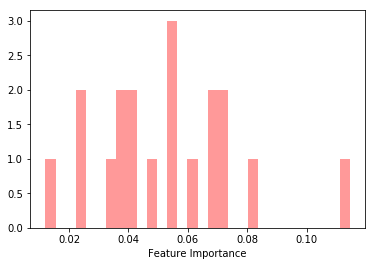

In [472]:
sns.distplot(info['Feature Importance'],bins=30,kde=False,color='red')

In [473]:
#Bag of Words

In [474]:
#Char n-grams

In [475]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    ngram_range=(1, 1),
    max_features=30000)

In [476]:
char_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='char',
    ngram_range=(1, 4),
    max_features=30000)
vectorizer = make_union(word_vectorizer, char_vectorizer, n_jobs=2)

In [477]:
X_train.columns

Index(['commentid', 'sarcastic or not', 'author', 'created_utc', 'date',
       'downs', 'score', 'subreddit', 'text', 'ups', 'no_of_words',
       'no_of_uppercase_letters', 'polarity', 'subjectivity', 'no_of_!',
       'no_of_dots', 'no_of_?', 'no_of_single_quotes', 'lower_text',
       'lower_wp', 'text_tokens', 'text_tokens_stop', 'lemmatized',
       'pos_tagged', 'pos_vector', 'Pos_NN', 'Pos_JJ', 'Pos_VB', 'Pos_RB',
       'Noun_Ratio', 'Adjective_Ratio', 'Verb_Ratio', 'Adverb_Ratio'],
      dtype='object')

In [478]:
X_train["text_tokens_stop"] = X_train["text_tokens_stop"].str.replace('\d+', '')

In [479]:
X_test["text_tokens_stop"] = X_test["text_tokens_stop"].str.replace('\d+', '')

In [480]:
train_text = X_train['text_tokens_stop']

In [481]:
test_text = X_test['text_tokens_stop']

In [482]:
all_text = pd.concat([train_text, test_text])

In [483]:
len(all_text)

16508

In [484]:
type(all_text)

pandas.core.series.Series

In [485]:
word_vectorizer.fit(all_text)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=30000, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents='unicode', sublinear_tf=True,
        token_pattern='\\w{1,}', tokenizer=None, use_idf=True,
        vocabulary=None)

In [486]:
train_words = word_vectorizer.transform(train_text)

In [487]:
test_words = word_vectorizer.transform(test_text)

In [488]:
train_words = train_words.toarray()

In [489]:
test_words = test_words.toarray()

In [490]:
train_words.shape

(13668, 14177)

In [491]:
word_vectorizer.get_feature_names()

['_',
 '___',
 '_against_',
 '_donald',
 '_entertainment_',
 '_everybody_',
 '_heh_',
 '_i',
 '_promotes_',
 'aa',
 'aaaaaaaaahhhhhhhh',
 'aaaaaand',
 'aaaahnnddd',
 'aaaand',
 'aaand',
 'aaannnnd',
 'aaron',
 'abandon',
 'abandoning',
 'abbreviating',
 'abc',
 'abdication',
 'abe',
 'abedin',
 'abide',
 'abiding',
 'abilities',
 'ability',
 'abject',
 'able',
 'abnormal',
 'aboard',
 'abolish',
 'abolished',
 'abolishing',
 'abominations',
 'abort',
 'aborted',
 'aborting',
 'abortion',
 'abortions',
 'abortive',
 'aboutbreitbart',
 'abraham',
 'abrahamic',
 'abroad',
 'abromovich',
 'abruptly',
 'absent',
 'absenteeism',
 'absolute',
 'absolutely',
 'absolve',
 'absolves',
 'abstinence',
 'abstinenceonly',
 'absurd',
 'absurdity',
 'abuela',
 'abundant',
 'abuse',
 'abused',
 'abuser',
 'abusers',
 'abuses',
 'abusing',
 'abusive',
 'aca',
 'academia',
 'academic',
 'academics',
 'acapella',
 'accelerating',
 'accent',
 'accept',
 'acceptable',
 'acceptance',
 'accepted',
 'accepting

In [492]:
test_words.shape

(2840, 14177)

In [493]:
classifier = LogisticRegression(solver='sag')

In [494]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=20, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, train_words, train_Y, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\vamsi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-494-f24b167cfda9>", line 6, in <module>
    results = model_selection.cross_val_score(modelCV, train_words, train_Y, cv=kfold, scoring=scoring)
  File "C:\Users\vamsi\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 342, in cross_val_score
    pre_dispatch=pre_dispatch)
  File "C:\Users\vamsi\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 206, in cross_validate
    for train, test in cv.split(X, y, groups))
  File "C:\Users\vamsi\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py", line 779, in __call__
    while self.dispatch_one_batch(iterator):
  File "C:\Users\vamsi\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py", line 625, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\

KeyboardInterrupt: 

In [ ]:
classifier.fit(train_words, train_Y)

In [ ]:
result = classifier.predict_proba(test_words)[:, 1]

In [ ]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(test_words, test_Y)))

In [ ]:
# CHARACTER N_ GRAMS

In [ ]:
char_vectorizer.fit(all_text)

In [ ]:
train_chars = char_vectorizer.transform(train_text)

In [ ]:
test_chars = char_vectorizer.transform(test_text)

In [ ]:
char_vectorizer.get_feature_names()

In [ ]:
train_chars = train_chars.toarray()

In [ ]:
test_chars = test_chars.toarray()

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=20, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, train_chars, train_Y, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

In [ ]:
classifier.fit(train_chars, train_Y)

In [ ]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(test_chars, test_Y)))

# <u> *Feed Forward Neural Network using Keras*

In [ ]:
classifier_nn = Sequential()
from keras.optimizers import RMSprop
rmsprop = RMSprop(lr =0.0001)

In [ ]:
from keras import backend as K
def root_mean_squared_log_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(K.log(y_pred+1) - K.log(y_true+1)), axis=-1)) 

In [ ]:
input_node = 14177

In [ ]:
classifier_nn.add(Dense(100, activation ='relu',input_dim = input_node))
classifier_nn.add(Dropout(rate= 0.1))

In [ ]:
classifier_nn.add(Dense(20 , init ='he_normal', activation ='relu'))
classifier_nn.add(Dropout(rate=0.1))

In [ ]:
classifier_nn.add(Dense(output_dim = 1 , activation = "sigmoid",init ='uniform'))

In [ ]:
classifier_nn.summary()

In [ ]:
classifier_nn.compile( optimizer= "adam" , loss='binary_crossentropy', metrics = ["accuracy"]  )

In [ ]:
early_stop = EarlyStopping(monitor='val_acc', min_delta=0.0001, patience=1, \
                          verbose=1, mode='auto')

In [ ]:
model_info  = classifier_nn.fit(train_words, train_Y ,validation_split=0.1,batch_size=64,epochs=10,callbacks=[early_stop])

In [ ]:
#classifier.evaluate(test_words,test_Y) [0.9685665060097063,0.24397521308610137,0.657746478705339,0.6880829347691065]///

In [ ]:
pred = classifier_nn.predict_classes(test_words)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

acc = accuracy_score(test_Y,pred)
print(acc)
print(classification_report(test_Y,pred))
print(confusion_matrix(y_true = test_Y,y_pred= pred))


# <u> *Character N-grams*

In [ ]:
classifier_ngrams = Sequential()
from keras.optimizers import RMSprop
rmsprop = RMSprop(lr =0.0001)

In [ ]:
input_node = 28249

In [ ]:
BatchNormalization()
classifier_ngrams.add(Dense(300, activation ='relu',input_dim = input_node))
BatchNormalization()
classifier_ngrams.add(Dropout(rate= 0.5))

In [ ]:
classifier_ngrams.add(Dense(4 , init ='he_normal', activation ='relu'))
classifier_ngrams.add(Dropout(rate=0.4))
BatchNormalization()

In [ ]:
classifier_ngrams.add(Dense(output_dim = 1 , activation = "sigmoid",init ='uniform'))

In [ ]:
classifier_ngrams.summary()

In [ ]:
classifier_ngrams.compile( optimizer= optimizers.RMSprop(lr = 0.001) , loss='mse', metrics = ["accuracy"] )

In [ ]:
model_info_ngrams  = classifier_ngrams.fit(train_chars, train_Y ,validation_split=0.1,batch_size=128,epochs=10,callbacks= [early_stop])

In [ ]:
pred = classifier_ngrams.predict_classes(test_chars)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

acc = accuracy_score(test_Y,pred)
print(acc)
print(classification_report(test_Y,pred))
print(confusion_matrix(y_true = test_Y,y_pred= pred))


# <u> *Numerical Features Neural Network*

In [ ]:
x_train = np.array(ig_x.values)

In [ ]:
x_train.shape

In [ ]:
x_test = pd.DataFrame(X_test[['downs', 'score','ups', 'no_of_words',
       'no_of_uppercase_letters', 'polarity', 'subjectivity', 'no_of_!',
       'no_of_dots', 'no_of_?', 'no_of_single_quotes', 'Pos_NN', 'Pos_JJ', 'Pos_VB', 'Pos_RB',
       'Noun_Ratio', 'Adjective_Ratio', 'Verb_Ratio', 'Adverb_Ratio']])

In [ ]:
x_test = np.array(x_test)

In [ ]:
x_test

In [342]:
x_train

array([[ 0.        ,  9.        ,  9.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , 17.        , 17.        , ...,  0.125     ,
         0.        ,  0.        ],
       [ 0.        ,  3.        ,  3.        , ...,  0.08      ,
         0.12      ,  0.04      ],
       ...,
       [-1.        ,  2.        , -1.        , ...,  0.09523809,
         0.09523809,  0.        ],
       [-1.        ,  1.        , -1.        , ...,  0.16666667,
         0.        ,  0.08333333],
       [-1.        ,  2.        , -1.        , ...,  0.        ,
         0.25      ,  0.25      ]])

In [343]:
train_Y

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [344]:
test_Y

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [345]:
classifier_number = Sequential()
from keras.optimizers import RMSprop
rmsprop = RMSprop(lr =0.0001)

In [356]:
input_node = 33

In [357]:
BatchNormalization()
classifier_number.add(Dense(100, activation ='relu',input_dim = input_node))
BatchNormalization()
classifier_number.add(Dropout(rate= 0.2))

In [358]:
classifier_number.add(Dense(40 , init ='he_normal', activation ='relu'))
classifier_number.add(Dropout(rate=0.2))
BatchNormalization()

C:\Users\vamsi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(4, activation="relu", kernel_initializer="he_normal")`
  """Entry point for launching an IPython kernel.


In [359]:
classifier_number.add(Dense(output_dim = 1 , activation = "sigmoid",init ='uniform'))

C:\Users\vamsi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


In [360]:
classifier_number.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 100)               2000      
_________________________________________________________________
dropout_23 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 4)                 404       
_________________________________________________________________
dropout_24 (Dropout)         (None, 4)                 0         
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 5         
_________________________________________________________________
dense_36 (Dense)             (None, 100)               200       
_________________________________________________________________
dropout_25 (Dropout)         (None, 100)               0         
__________

In [361]:
classifier_number.compile( optimizer= RMSprop(lr = 0.001) , loss='mse', metrics = ["accuracy"]  )

In [413]:
model_info_number  = classifier_number.fit(x_train, train_Y ,validation_split=0.1,batch_size=16,epochs=10,callbacks=[early_stop])

Train on 12301 samples, validate on 1367 samples
Epoch 1/10
12301/12301 [==============================] - 3s 223us/step - loss: 0.2475 - acc: 0.5406 - f1_score: 0.5551 - val_loss: 0.2435 - val_acc: 0.5633 - val_f1_score: 0.5489
Epoch 2/10
12301/12301 [==============================] - 1s 111us/step - loss: 0.2405 - acc: 0.5824 - f1_score: 0.6038 - val_loss: 0.2379 - val_acc: 0.5918 - val_f1_score: 0.6129
Epoch 3/10
12301/12301 [==============================] - 1s 108us/step - loss: 0.2385 - acc: 0.5857 - f1_score: 0.6039 - val_loss: 0.2366 - val_acc: 0.5955 - val_f1_score: 0.6119
Epoch 4/10
12301/12301 [==============================] - 1s 111us/step - loss: 0.2367 - acc: 0.5917 - f1_score: 0.6063 - val_loss: 0.2358 - val_acc: 0.5918 - val_f1_score: 0.6604
Epoch 5/10
12301/12301 [==============================] - 1s 111us/step - loss: 0.2365 - acc: 0.5913 - f1_score: 0.6125 - val_loss: 0.2360 - val_acc: 0.6006 - val_f1_score: 0.6113
Epoch 6/10
12301/12301 [===========================

In [362]:
pred = classifier_number.predict_classes(X_test)

ValueError: Error when checking : expected dense_33_input to have shape (19,) but got array with shape (35,)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

acc = accuracy_score(test_Y,pred)
print(acc)
print(classification_report(test_Y,pred))
print(confusion_matrix(y_true = test_Y,y_pred= pred))


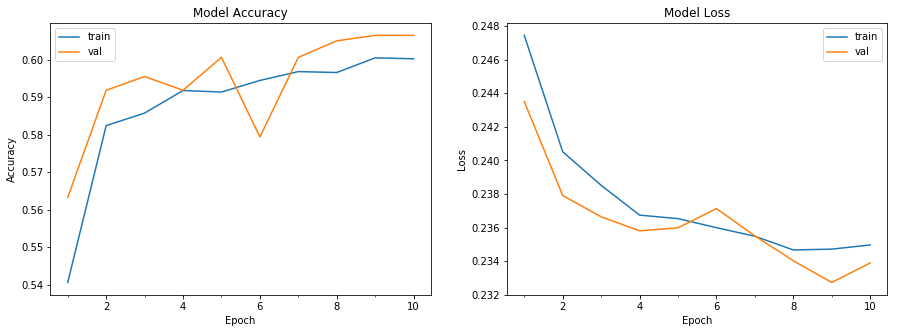

In [415]:
plot_model_history(model_info_number)

In [414]:
classifier_number.evaluate(x_test,test_Y)

2840/2840 [==============================] - 0s 32us/step


[0.23246369164594463, 0.6073943660292827, 0.645104938493648]

In [414]:
def basic_model(x_train, y_train, x_test, y_test,
                 epochs=15, batch_size=32,drate = 0.5,hidden_units_1=40,hidden_units_2 = 4,save=False, plot_graph=False):
    # Build the model
    print("\nBuilding Bow NN model...")
    model = Sequential()
    model.add(Dense(hidden_units_1, input_shape=(x_train.shape[1],), activation='relu'))
    BatchNormalization()
    model.add(Dropout(rate = drate))
    model.add(Dense(hidden_units_2,activation = "relu"))
    model.add(Dense(1, activation='sigmoid'))
    model.summary()

    
    model.compile(loss='binary_crossentropy', optimizer= optimizers.RMSprop(lr = 0.001), metrics=['accuracy'])
    history = model.fit(x_train, y_train,validation_split = 0.1,batch_size=batch_size, epochs=epochs, verbose=1,callbacks=[early_stop])

    # Evaluate the model
    loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
    print(loss,acc)
    classes = model.predict_classes(x_test, batch_size=batch_size)
   

# <u>*Latent Dirchlet Allocation Topics Embedding*

In [415]:
X_t_100 = pd.read_csv("E:\\Datasets\\Final Project\\Politics Final\\test_balanced\\topics\\train_topics_100.csv")

In [416]:
X_test_100 = pd.read_csv("E:\\Datasets\\Final Project\\Politics Final\\test_balanced\\topics\\test_topics_100.csv")

In [417]:
topics100 = basic_model(X_t_100,train_Y,X_test_100,test_Y,epochs= 10,drate=0.4,batch_size=64,hidden_units_1=120,plot_graph=True)


Building Bow NN model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 100)               10200     
_________________________________________________________________
dropout_36 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_65 (Dense)             (None, 4)                 404       
_________________________________________________________________
dense_66 (Dense)             (None, 1)                 5         
Total params: 10,609
Trainable params: 10,609
Non-trainable params: 0
_________________________________________________________________
Train on 12301 samples, validate on 1367 samples
Epoch 1/10
12301/12301 [==============================] - 1s 98us/step - loss: 1.7744 - acc: 0.5034 - val_loss: 0.6932 - val_acc: 0.5011
Epoch 2/10
12301/12301 [==============================] - 

#  <u> Topics = 80

In [418]:
X_t_80 = pd.read_csv("E:\\Datasets\\Final Project\\Politics Final\\test_balanced\\topics\\train_topics_80.csv")

In [419]:
X_test_80 = pd.read_csv("E:\\Datasets\\Final Project\\Politics Final\\test_balanced\\topics\\test_topics_80.csv")

In [420]:
topics80 = basic_model(X_t_80,train_Y,X_test_80,test_Y,epochs= 10,drate=0.3,batch_size=100,hidden_units_1=100)


Building Bow NN model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_67 (Dense)             (None, 80)                6560      
_________________________________________________________________
dropout_37 (Dropout)         (None, 80)                0         
_________________________________________________________________
dense_68 (Dense)             (None, 4)                 324       
_________________________________________________________________
dense_69 (Dense)             (None, 1)                 5         
Total params: 6,889
Trainable params: 6,889
Non-trainable params: 0
_________________________________________________________________
Train on 12301 samples, validate on 1367 samples
Epoch 1/10
12301/12301 [==============================] - 1s 118us/step - loss: 1.8310 - acc: 0.4987 - val_loss: 0.6932 - val_acc: 0.5011
Epoch 2/10
12301/12301 [==============================] - 0

# <u> Topics =  60 

In [421]:
X_t_60 = pd.read_csv("E:\\Datasets\\Final Project\\Politics Final\\test_balanced\\topics\\train_topics_60.csv")

In [422]:
X_test_60 = pd.read_csv("E:\\Datasets\\Final Project\\Politics Final\\test_balanced\\topics\\test_topics_60.csv")

In [423]:
topics60 = basic_model(X_t_60,train_Y,X_test_60,test_Y,epochs= 10,drate=0.3,batch_size=100,hidden_units_1=80,plot_graph=True)


Building Bow NN model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_70 (Dense)             (None, 60)                4920      
_________________________________________________________________
dropout_38 (Dropout)         (None, 60)                0         
_________________________________________________________________
dense_71 (Dense)             (None, 4)                 244       
_________________________________________________________________
dense_72 (Dense)             (None, 1)                 5         
Total params: 5,169
Trainable params: 5,169
Non-trainable params: 0
_________________________________________________________________
Train on 12301 samples, validate on 1367 samples
Epoch 1/10
12301/12301 [==============================] - 1s 98us/step - loss: 5.7190 - acc: 0.4948 - val_loss: 0.6935 - val_acc: 0.5011
Epoch 2/10
12301/12301 [==============================] - 0s

# __*LSI word Embedding = 100*__

In [424]:
lsitr_100 = pd.read_csv("E:\\Datasets\\Final Project\\Politics Final\\test_balanced\\LSI topics\\lsi_train_100.csv")

In [425]:
lsitest_100 = pd.read_csv("E:\\Datasets\\Final Project\\Politics Final\\test_balanced\\LSI topics\\lsi_test_100.csv")

In [426]:
topics60 = basic_model(lsitr_100,train_Y,lsitest_100,test_Y,epochs= 10,drate=0.3,batch_size=120,hidden_units_1=100)


Building Bow NN model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_73 (Dense)             (None, 100)               10200     
_________________________________________________________________
dropout_39 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_74 (Dense)             (None, 4)                 404       
_________________________________________________________________
dense_75 (Dense)             (None, 1)                 5         
Total params: 10,609
Trainable params: 10,609
Non-trainable params: 0
_________________________________________________________________
Train on 12301 samples, validate on 1367 samples
Epoch 1/10
12301/12301 [==============================] - 1s 93us/step - loss: 7.8809 - acc: 0.4965 - val_loss: 7.9887 - val_acc: 0.4989
Epoch 2/10
12301/12301 [==============================] - 

#  *LSI word Embedding = 80*

In [427]:
lsitr_80 = pd.read_csv("E:\\Datasets\\Final Project\\Politics Final\\test_balanced\\LSI topics\\lsi_train_80.csv")

In [428]:
lsitest_80 = pd.read_csv("E:\\Datasets\\Final Project\\Politics Final\\test_balanced\\LSI topics\\lsi_test_80.csv")

In [429]:
topics80 = basic_model(lsitr_80,train_Y,lsitest_80,test_Y,epochs= 10,drate=0.3,batch_size=100,hidden_units_1=80)


Building Bow NN model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_76 (Dense)             (None, 80)                6560      
_________________________________________________________________
dropout_40 (Dropout)         (None, 80)                0         
_________________________________________________________________
dense_77 (Dense)             (None, 4)                 324       
_________________________________________________________________
dense_78 (Dense)             (None, 1)                 5         
Total params: 6,889
Trainable params: 6,889
Non-trainable params: 0
_________________________________________________________________
Train on 12301 samples, validate on 1367 samples
Epoch 1/10
12301/12301 [==============================] - 1s 91us/step - loss: 3.2657 - acc: 0.5021 - val_loss: 0.6934 - val_acc: 0.4989
Epoch 2/10
12301/12301 [==============================] - 0s

In [ ]:
#